In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df= pd.read_csv("C:/Users/PowerUser/Desktop/New folder/Datasets/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\PowerUser\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

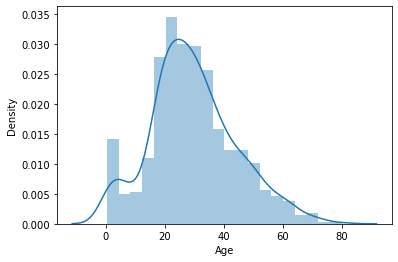

In [52]:
sns.distplot(df['Age'])

### Gaussian Distribution

Text(0, 0.5, 'No. of Passenger')

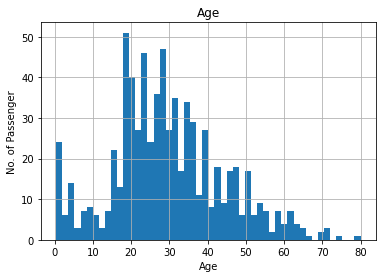

In [53]:
figure = df.Age.hist(bins = 50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No. of Passenger')

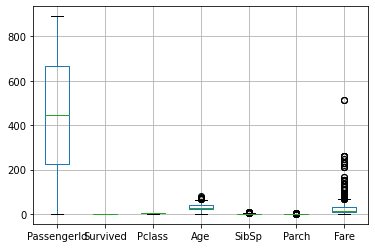

In [54]:
#Checking for an Outlier
figure= df.boxplot()

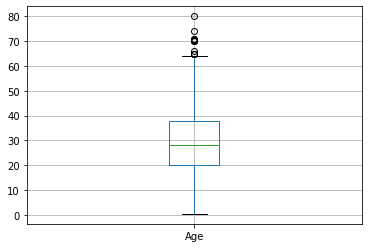

In [55]:
figure = df.boxplot(column = 'Age')

In [56]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [57]:
#Assuming Age follows a Gaussian Distribution we will calculate the boundaries which differentiates the Outiers
upper_boundary = df['Age'].mean() + 3* df['Age'].std()
lower_boundary = df['Age'].mean() - 3* df['Age'].std()
print(upper_boundary, lower_boundary)

73.27860964406095 -13.88037434994331


### Feature is Skewed

Text(0, 0.5, 'No. of Passenger')

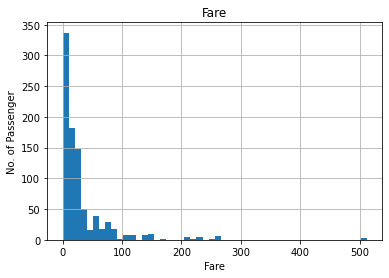

In [58]:
figure = df.Fare.hist(bins = 50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of Passenger')

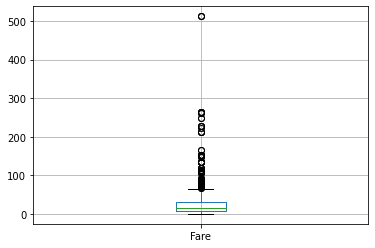

In [59]:
figure = df.boxplot(column = 'Fare')

In [60]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [61]:
IQR = df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
lower_bridge = df.Fare.quantile(0.25)- (IQR*1.5)
upper_bridge = df.Fare.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-26.724 65.6344


In [62]:
###Extreme Outliers
lower_bridge = df.Fare.quantile(0.25)- (IQR*3)
upper_bridge = df.Fare.quantile(0.75)+(IQR*3)
print(lower_bridge, upper_bridge)

-61.358399999999996 100.2688


In [63]:
data = df.copy()

In [64]:
data.loc[data['Age']>=73,'Age']=73
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No. of Passenger')

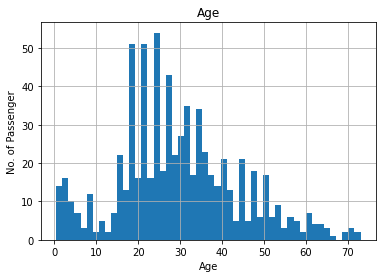

In [65]:
figure = data.Age.hist(bins = 50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No. of Passenger')

Text(0, 0.5, 'No. of Passenger')

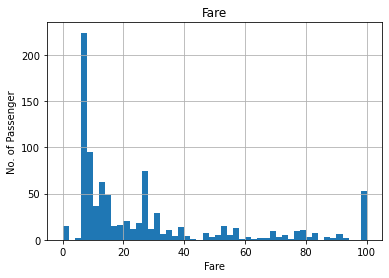

In [66]:
figure = data.Fare.hist(bins = 50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of Passenger')

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size = 0.3)

In [68]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy_score: {}'.format(accuracy_score(y_test,y_pred)))
print('Roc_Auc_score: {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6567164179104478
Roc_Auc_score: 0.724493291464459


In [69]:
### RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy_score: {}'.format(accuracy_score(y_test,y_pred)))
print('Roc_Auc_score: {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6753731343283582
Roc_Auc_score: 0.7253782472166714
